In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

1.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
train_images.shape


(60000, 28, 28)

In [7]:
train_labels.shape


(60000,)

In [8]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

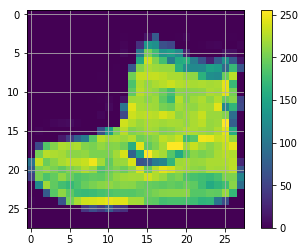

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(True)

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

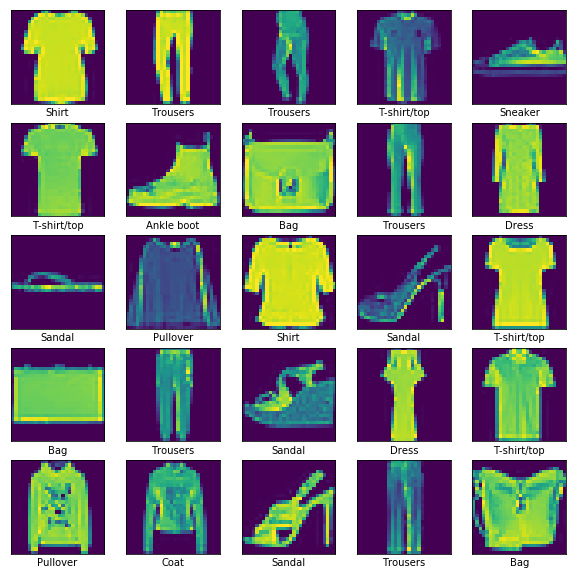

In [17]:
from random import randrange
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(1, 26):
    idx = randrange(60000)
    plt.subplot(5, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[idx]
#                , cmap=plt.cm.binary
              )
    plt.xlabel(class_names[train_labels[idx]])

In [106]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [107]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [111]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2733 - acc: 0.8987
Epoch 2/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2584 - acc: 0.9022
Epoch 3/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2461 - acc: 0.9073
Epoch 4/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2378 - acc: 0.9102
Epoch 5/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2298 - acc: 0.9125
Epoch 6/6
60000/60000 [==============================] - 4s 66us/step - loss: 0.2188 - acc: 0.9167


In [112]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [113]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8868


In [30]:
predictions = model.predict(test_images)

In [31]:
predictions[:3]

array([[8.0161799e-06, 8.8581828e-07, 7.8580854e-07, 4.7682040e-08,
        2.9254733e-07, 7.1778083e-03, 1.2392250e-06, 9.0983696e-03,
        4.1846506e-06, 9.8370832e-01],
       [2.5646805e-05, 7.9209883e-08, 9.9397486e-01, 9.7268789e-09,
        4.6171783e-03, 5.4595868e-12, 1.3816770e-03, 9.7820738e-14,
        4.5118770e-07, 3.9940504e-13],
       [8.6298996e-06, 9.9998248e-01, 3.5317987e-07, 2.7492474e-06,
        5.7888751e-06, 3.9614857e-11, 9.3296464e-09, 2.0830001e-13,
        4.9493649e-09, 6.6018301e-13]], dtype=float32)

In [32]:
np.argmax(predictions[1])

2

In [33]:
test_labels[1]

2

In [92]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img
#                , 
#                cmap=plt.cm.binary
              )

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("#{}: {} {:2.0f}% ({})".
               format(i,
                      class_names[predicted_label],
                      100*np.max(predictions_array),
                      class_names[true_label]),
               color=color)

def plot_value_array(i, predictions_array, true_label, xticks=False):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    if(xticks):
        plt.xticks(range(10))
    else:
        plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#666666")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    plt.annotate('%.2f' % predictions_array[true_label], (true_label-.7,.3))
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

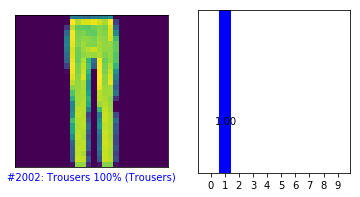

In [93]:
i = randrange(10000)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels, xticks=True)

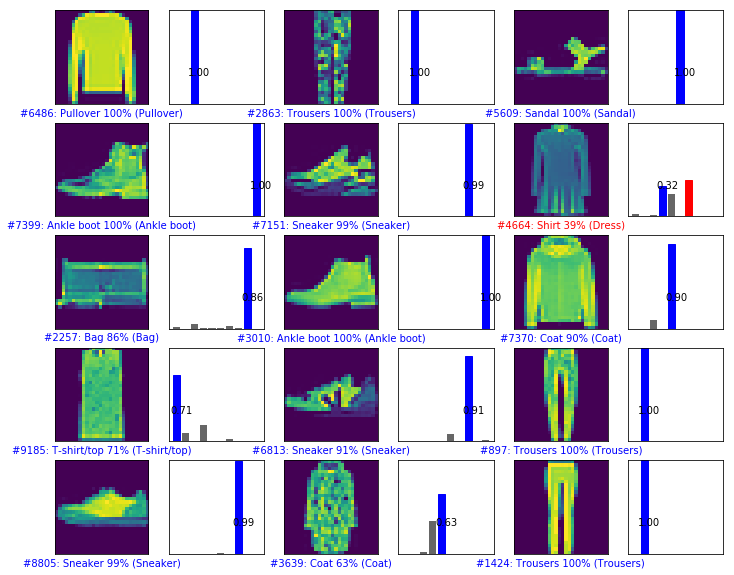

In [95]:
num_rows = 5
num_cols = 3
num_images= num_rows * num_cols
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    idx = randrange(10000)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(idx, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(idx, predictions, test_labels)